<a href="https://colab.research.google.com/github/aashish704/STW7072CEM_machine_learning/blob/main/heart_failure_predction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import the dataset from 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records'

aashish sapkota




Applying machine learning to medical records offers a valuable tool for predicting patient survival, uncovering patterns, and prioritizing features to identify potential risk factors that may elude manual diagnosis by healthcare professionals. This notebook initiates the analysis with exploratory data analysis (EDA) to grasp the dataset's intricacies, followed by preprocessing steps essential for effective learning. Subsequently, a series of machine learning models are trained on the refined dataset with the objective of forecasting the survival outcomes of patients affected by heart failure (X).

import dataset
--

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
heart_failure_clinical_records = fetch_ucirepo(id=519)

# data (as pandas dataframes)
X = heart_failure_clinical_records.data.features
y = heart_failure_clinical_records.data.targets


# metadata
print(heart_failure_clinical_records.metadata)

# variable information
print(heart_failure_clinical_records.variables)

{'uci_id': 519, 'name': 'Heart Failure Clinical Records', 'repository_url': 'https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records', 'data_url': 'https://archive.ics.uci.edu/static/public/519/data.csv', 'abstract': 'This dataset contains the medical records of 299 patients who had heart failure, collected during their follow-up period, where each patient profile has 13 clinical features.', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 299, 'num_features': 12, 'feature_types': ['Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['death_event'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5Z89R', 'creators': [], 'intro_paper': {'title': 'Machine learning can predict survival of patients with heart failure from serum creatinine and ejec

Heart failure clinical records Data Set contains the medical records of 299 patients who had heart failure.
The dataset contains 11 clinical features (some of them are binary, others are numerical), the follow-up period and the label death_event that indicates whether or not the patient has died.
We can find some features strictly related to medical aspects like levels of enzymes, sodium, creatinine and platelets in the blood and others that are more common like age, sex or smoking.

Exploratory data analisys
--

import all the necessary libraries for graph plot

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.animation as animation

In [ ]:
hf = pd.concat([X, y], axis=1)

In [ ]:
hf.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


To be consistent with the feature description let's represent the platelets as kiloplatelets/mL and also for consciousness of field rename creatinine_phosphokinase as CPK

In [ ]:
hf.platelets = hf.platelets/1000

In [ ]:
hf["CPK"] = hf["creatinine_phosphokinase"]
hf = hf.drop("creatinine_phosphokinase", axis=1)

Feature Distribution
--

division on dataset into numerical and categorical datasets

In [ ]:
numerical_features = ["age", "CPK", "ejection_fraction", "platelets", "serum_creatinine", "serum_sodium"]
categorical_features = ["anaemia", "diabetes", "high_blood_pressure", "sex", "smoking"]

<ipython-input-30-3aab177ce1ba>:9: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hf.loc[hf["death_event"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
<ipython-input-30-3aab177ce1ba>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hf.loc[hf["death_event"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
<ipython-input-30-3aab177ce1ba>:10: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(hf.loc[hf["death_event"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
<ipython-input-30-3aab177ce1ba>:10: FutureWarning: 

`shade` is now deprec

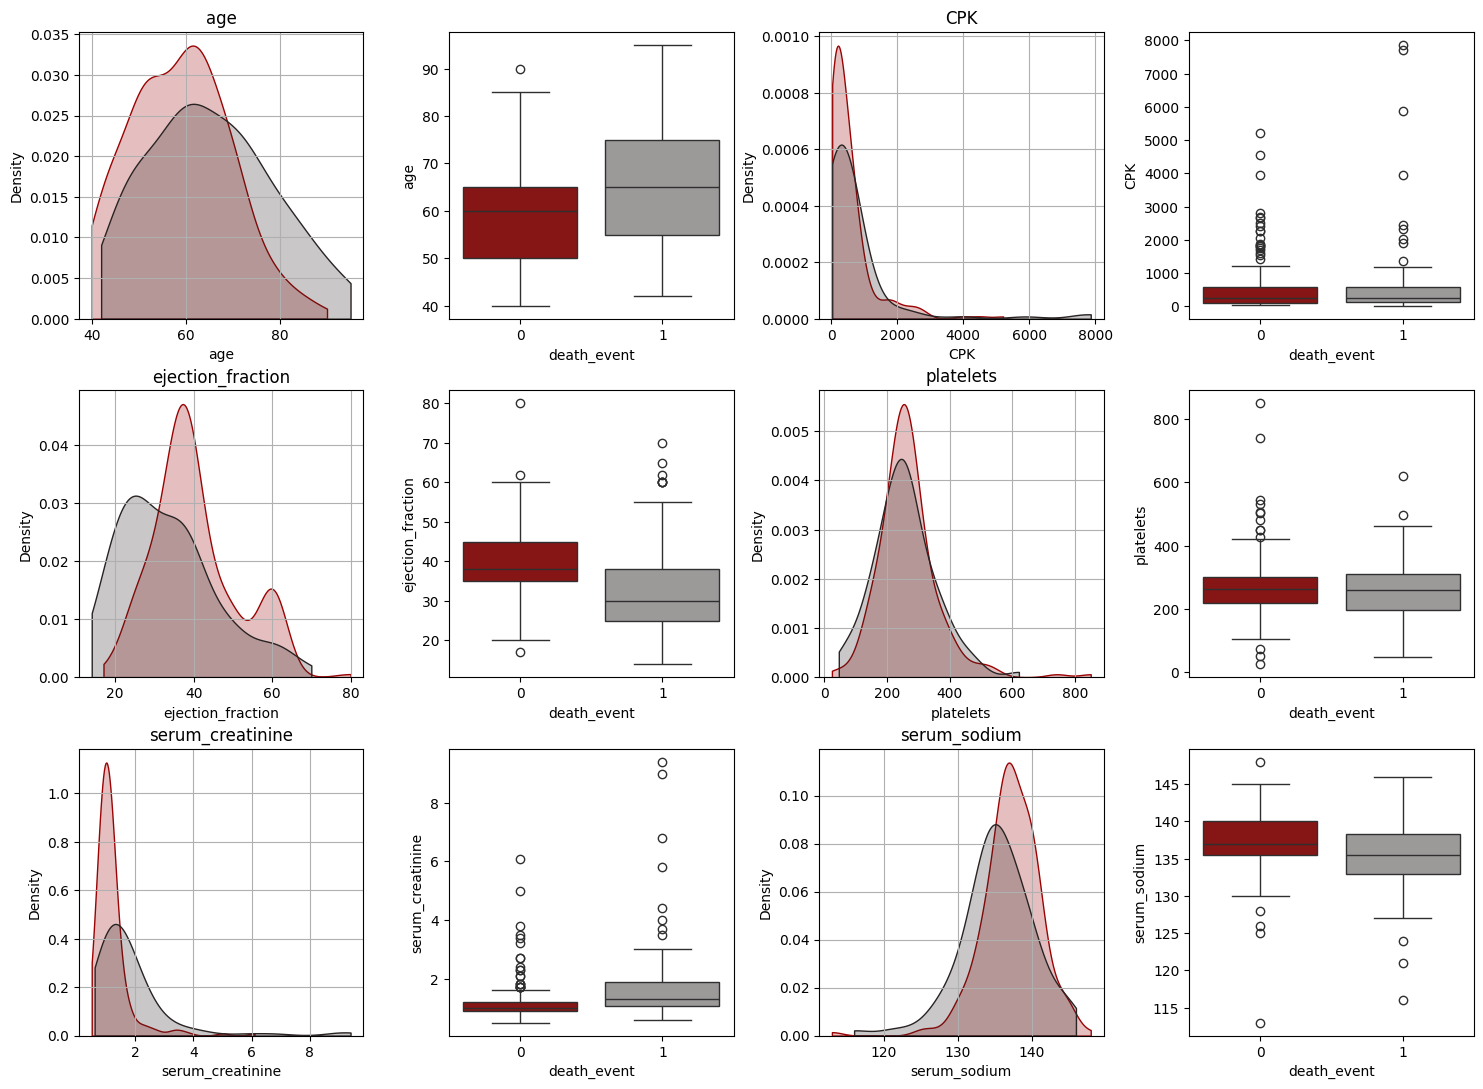

In [ ]:
plt.figure(figsize=(18, 27))

for i, col in enumerate(numerical_features):
    plt.subplot(6, 4, i*2+1)
    plt.subplots_adjust(hspace =.25, wspace=.3)

    plt.grid(True)
    plt.title(col)
    sns.kdeplot(hf.loc[hf["death_event"]==0, col], label="alive", color = "#990303", shade=True, kernel='gau', cut=0)
    sns.kdeplot(hf.loc[hf["death_event"]==1, col], label="dead",  color = "#292323", shade=True, kernel='gau', cut=0)
    plt.subplot(6, 4, i*2+2)
    sns.boxplot(y = col, data = hf, x="death_event", palette = ["#990303", "#9C9999"])

As we can see already from the unnormalized distribution plot of the features, the most informative ones seem to be ejection_fraction and serum_creatinine.

for categorical values

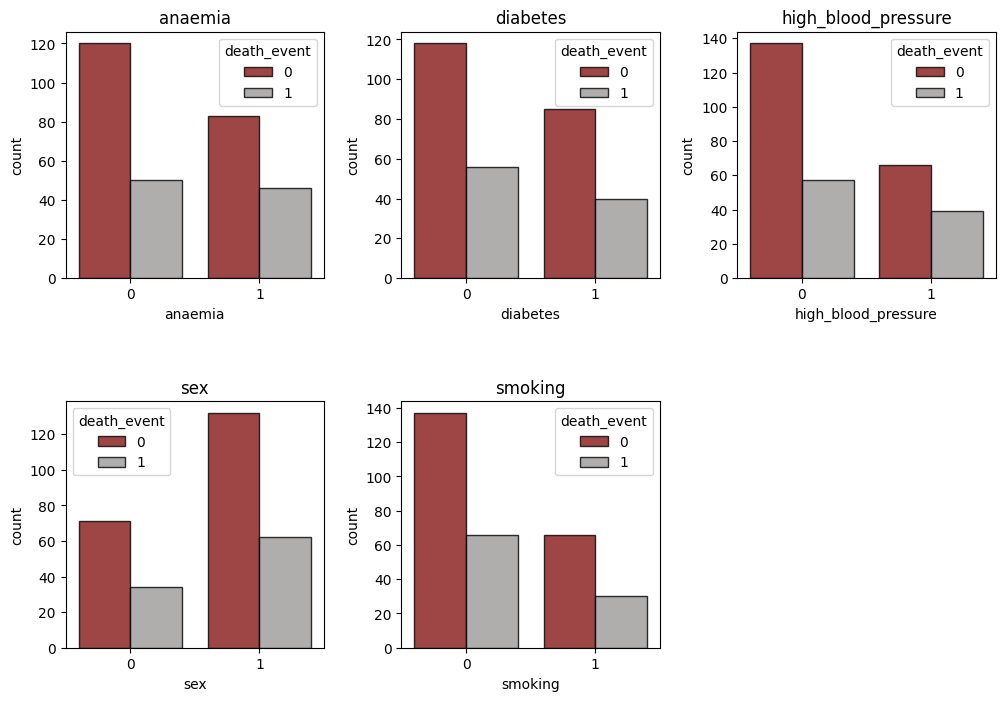

In [ ]:
plt.figure(figsize=(12, 8))

for i, col in enumerate(categorical_features):
    plt.subplot(2, 3, i+1)
    plt.title(col)
    plt.subplots_adjust(hspace =.5, wspace=.3)
    sns.countplot(data=hf, x=col, hue="death_event", palette = ["#990303", "#9C9999"], alpha=0.8, edgecolor="k", linewidth=1)

standardization
--

One important step is standardization for numerical features that is performed via the standard sklearn function, removing the mean and scaling to unit variance.

z=(x−x¯) / σ̂
where x¯
 is the mean of the training samples and σ̂
 is the sample standard deviation.

In [ ]:
from sklearn.preprocessing import StandardScaler

<ipython-input-33-944770de27e5>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = "ejection_fraction", data = hf, x="death_event", palette = ["#990303", "#9C9999"])
<ipython-input-33-944770de27e5>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y = "ejection_fraction", data = hf_norm, x="death_event", palette = ["#990303", "#9C9999"]);


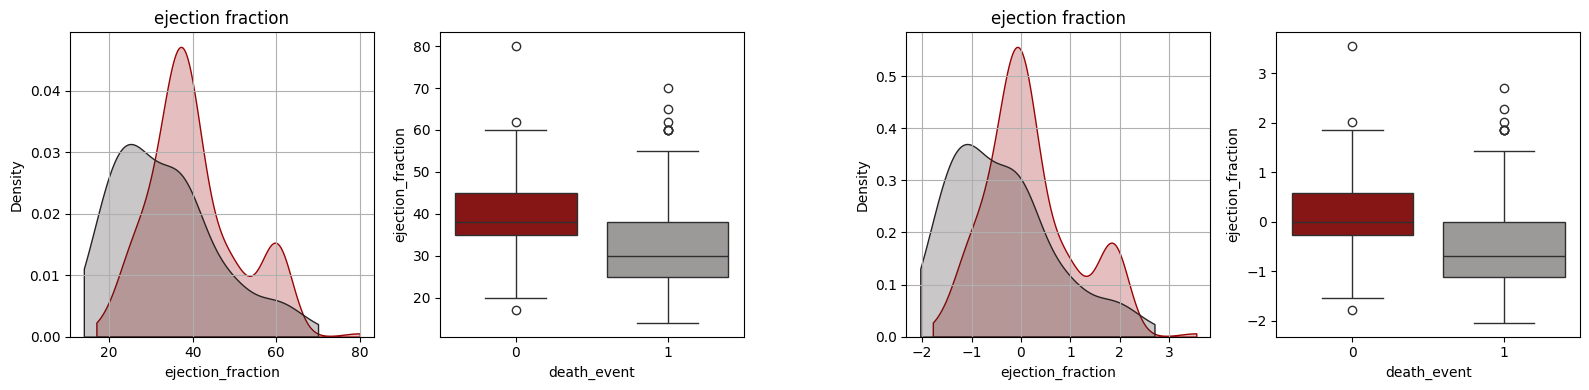

In [ ]:
import matplotlib.image as mpimg
from matplotlib import gridspec

hf_norm = hf.copy()

for i, col in enumerate(numerical_features):
    hf_norm[[col]] = StandardScaler(with_mean=True, with_std=True).fit_transform(hf_norm[[col]])

plt.figure(figsize=(16, 4))
gs  = gridspec.GridSpec(1, 5, width_ratios=[1, 1 ,0.1, 1, 1])
plt.subplot(gs[0])
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf.loc[hf["death_event"]==0, "ejection_fraction"], label="alive", color = "#990303", fill=True, cut=0)
sns.kdeplot(hf.loc[hf["death_event"]==1, "ejection_fraction"], label="dead",  color = "#292323", fill=True, cut=0)
plt.subplot(gs[1])
sns.boxplot(y = "ejection_fraction", data = hf, x="death_event", palette = ["#990303", "#9C9999"])
plt.subplot(gs[2])
# plt.imshow(mpimg.imread("img/right_arrow.png"))
plt.axis('off')
plt.subplot(gs[3])
plt.grid(True)
plt.title("ejection fraction")
sns.kdeplot(hf_norm.loc[hf["death_event"]==0, "ejection_fraction"], label="alive", color = "#990303", fill=True,  cut=0)
sns.kdeplot(hf_norm.loc[hf["death_event"]==1, "ejection_fraction"], label="dead",  color = "#292323", fill=True,  cut=0)
plt.subplot(gs[4])
sns.boxplot(y = "ejection_fraction", data = hf_norm, x="death_event", palette = ["#990303", "#9C9999"]);
plt.tight_layout()

Correleation matrix
--

To see how features are correlated is useful to look at the correlation matrix that is a matrix in which are showed the correlation values of each couple of features according to the Pearson's correlation coefficient:

ρX1,X2=cov(X1,X2) / σX1σX2
Where cov
 stands for the covariance measure:

cov(X1,X2)=E[(X1−E[X1])(X2−E[X2])],
That is computed for every pair of features X1
 and X2

In [ ]:
all_features = categorical_features.copy()
all_features.extend(numerical_features)

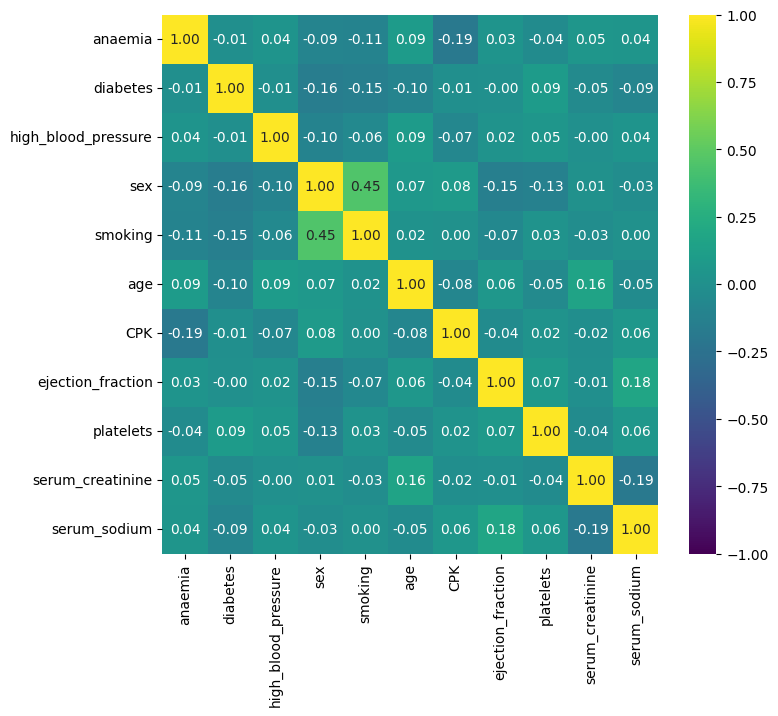

In [ ]:
plt.figure(figsize=(8, 7))
sns.heatmap(hf_norm[all_features].corr(method='pearson'), vmin=-1, vmax=1, cmap='viridis', annot=True, fmt='.2f');

class imbalance
--

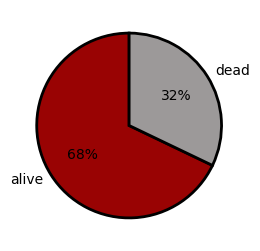

In [ ]:
plt.figure(figsize=(3, 3))
plt.pie(hf["death_event"].value_counts(),
        labels = ["alive", "dead"],
        colors = ["#990303", "#9C9999"],
        wedgeprops={'edgecolor':'black', 'linewidth': 2},
        autopct = lambda y: str(round(y))+"%",
        startangle=90);

In [ ]:
hf.groupby(["high_blood_pressure",'sex']).count()['death_event']

high_blood_pressure  sex
0                    0       61
                     1      133
1                    0       44
                     1       61
Name: death_event, dtype: int64

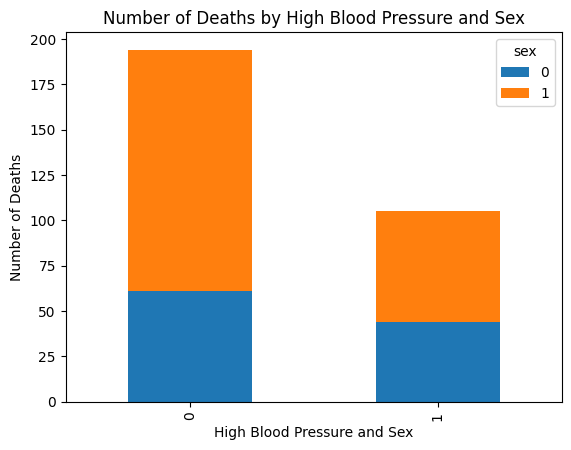

In [ ]:
import matplotlib.pyplot as plt

# group the data by high_blood_pressure and sex and count the number of occurrences of DEATH_EVENT for each group
death_counts = hf.groupby(['high_blood_pressure', 'sex'])['death_event'].count().unstack()

# plot the stacked bar chart
death_counts.plot(kind='bar', stacked=True)

# set the title and axis labels
plt.title('Number of Deaths by High Blood Pressure and Sex')
plt.xlabel('High Blood Pressure and Sex')
plt.ylabel('Number of Deaths')

# show the plot
plt.show()

Model Evaluation
--

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X,y=sm.fit_resample(X,y)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 47)

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV , cross_val_score , KFold

In [ ]:
def evaluate_model(model, X, y):
    cv = KFold(n_splits=5, random_state=42 , shuffle = True)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv)
    return scores

In [ ]:
print(f"Range of SVC possible model accuracies: {evaluate_model(SVC() , x_train , y_train).round(2)} with a mean of {evaluate_model(SVC() , x_train , y_train).mean().round(2)}")


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Range of SVC possible model accuracies: [0.82 0.71 0.65 0.72 0.72] with a mean of 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
print(f"Range of LogisticRegression possible model accuracies: {evaluate_model(LogisticRegression() , x_train , y_train).round(2)} with a mean of {evaluate_model(LogisticRegression() , x_train , y_train).mean().round(2)}")

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

Range of LogisticRegression possible model accuracies: [0.88 0.88 0.83 0.85 0.83] with a mean of 0.85


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(f"Range of RandomForestClassifier possible model accuracies: {evaluate_model(RandomForestClassifier() , x_train , y_train).round(2)} with a mean of {evaluate_model(RandomForestClassifier() , x_train , y_train).mean().round(2)}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Range of RandomForestClassifier possible model accuracies: [0.92 0.82 0.86 0.94 0.91] with a mean of 0.88


In [ ]:
from tabulate import tabulate

svc_accs = evaluate_model(SVC(), x_train, y_train)
logreg_accs = evaluate_model(LogisticRegression(), x_train, y_train)
rf_accs = evaluate_model(RandomForestClassifier(), x_train, y_train)

table = [
    ['SVC', svc_accs.mean().round(2), svc_accs.min().round(2), svc_accs.max().round(2)],
    ['LogisticRegression', logreg_accs.mean().round(2), logreg_accs.min().round(2), logreg_accs.max().round(2)],
    ['RandomForestClassifier', rf_accs.mean().round(2), rf_accs.min().round(2), rf_accs.max().round(2)]
]

headers = ['Model', 'Mean Accuracy', 'Min Accuracy', 'Max Accuracy']

print(tabulate(table, headers=headers))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

Model                     Mean Accuracy    Min Accuracy    Max Accuracy
----------------------  ---------------  --------------  --------------
SVC                                0.72            0.65            0.82
LogisticRegression                 0.85            0.83            0.88
RandomForestClassifier             0.87            0.77            0.94


In [ ]:
svc_params = [{'gamma': [0.001 , 0.01 , 0.1 , 1 , 10 , 100],   'C' : [0.001 , 0.01 , 0.1 , 1 , 10 , 100] }]

In [ ]:
log_parmas =  [{'C' : [0.001 , 0.01 , 0.1 , 1 , 10 , 100]}]

In [ ]:
rfc_params = { "max_depth" : [4,5,6,7,8],'criterion' :['gini', 'entropy']}

In [ ]:
def search_grid(model , X , y , param):
    gsvc = GridSearchCV(model , param ,cv = 5)
    return gsvc.fit(X,y)

In [ ]:
svc_grid = search_grid(SVC() , x_train , y_train , svc_params)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
pd.DataFrame(data = svc_grid.cv_results_ , columns = ["param_C" , "param_gamma" , "mean_test_score" , "rank_test_score"]).round(2).sort_values("rank_test_score").head()

,param_C,param_gamma,mean_test_score,rank_test_score
30,100,0.001,0.78,1
24,10,0.001,0.78,1
18,1,0.001,0.76,3
31,100,0.01,0.69,4
25,10,0.01,0.69,4


In [ ]:
log_grid = search_grid(LogisticRegression() , x_train , y_train , log_parmas)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
pd.DataFrame(data = log_grid.cv_results_ , columns = ["param_C" , "mean_test_score" ,"rank_test_score"]).round(2).sort_values("rank_test_score")

,param_C,mean_test_score,rank_test_score
4,10,0.85,1
3,1,0.84,2
2,0.1,0.84,3
5,100,0.83,4
1,0.01,0.81,5
0,0.001,0.79,6


In [ ]:
rfc_grid = search_grid(RandomForestClassifier() , x_train , y_train , rfc_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
pd.DataFrame(data = rfc_grid.cv_results_ , columns = ["param_max_depth" , "param_criterion" ,"mean_test_score" , "rank_test_score"]).round(3).sort_values("rank_test_score").head()

,param_max_depth,param_criterion,mean_test_score,rank_test_score
2,6,gini,0.880,1
8,7,entropy,0.880,1
5,4,entropy,0.880,3
9,8,entropy,0.877,4
1,5,gini,0.877,5


model creation
--

In [ ]:
svc = SVC(C = 0.001 , gamma = 0.001).fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
logreg = LogisticRegression(C = 0.001).fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
rfc = RandomForestClassifier(max_depth = 4).fit(x_train , y_train)

<ipython-input-59-54b996dd01b6>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc = RandomForestClassifier(max_depth = 4).fit(x_train , y_train)


In [ ]:
print(f"SVC Training Score: {svc.score(x_train , y_train)}")
print(f"SVC Testing Score: {svc.score(x_test , y_test)}")

SVC Training Score: 0.5061728395061729
SVC Testing Score: 0.47560975609756095


In [ ]:
print(f"LogisticRegression Training Score: {logreg.score(x_train , y_train)}")
print(f"LogisticRegression Testing Score: {logreg.score(x_test , y_test)}")

LogisticRegression Training Score: 0.8209876543209876
LogisticRegression Testing Score: 0.7560975609756098


In [ ]:
print(f"RandomForestClassifier Training Score: {rfc.score(x_train , y_train)}")
print(f"RandomForestClassifier Testing Score: {rfc.score(x_test , y_test)}")

RandomForestClassifier Training Score: 0.9382716049382716
RandomForestClassifier Testing Score: 0.8292682926829268


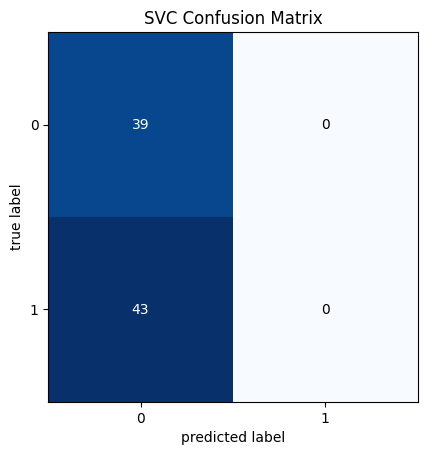

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test , svc.predict(x_test)))
plt.title("SVC Confusion Matrix")
plt.show()

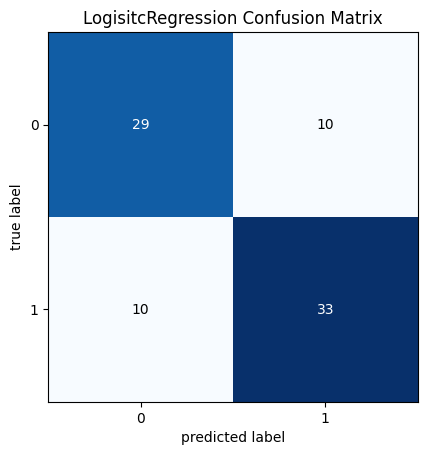

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test , logreg.predict(x_test)))
plt.title("LogisitcRegression Confusion Matrix")
plt.show()

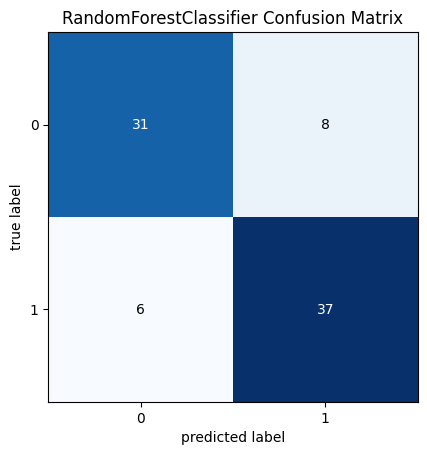

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test , rfc.predict(x_test)))
plt.title("RandomForestClassifier Confusion Matrix")
plt.show()

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
svc_precision , svc_recall , _ = precision_recall_curve(y_test , svc.decision_function(x_test))

In [ ]:
log_precision , log_recall , _ = precision_recall_curve(y_test , logreg.decision_function(x_test))

In [ ]:
rfc_precision , rfc_recall , _ = precision_recall_curve(y_test ,  rfc.predict_proba(x_test)[: , 1])

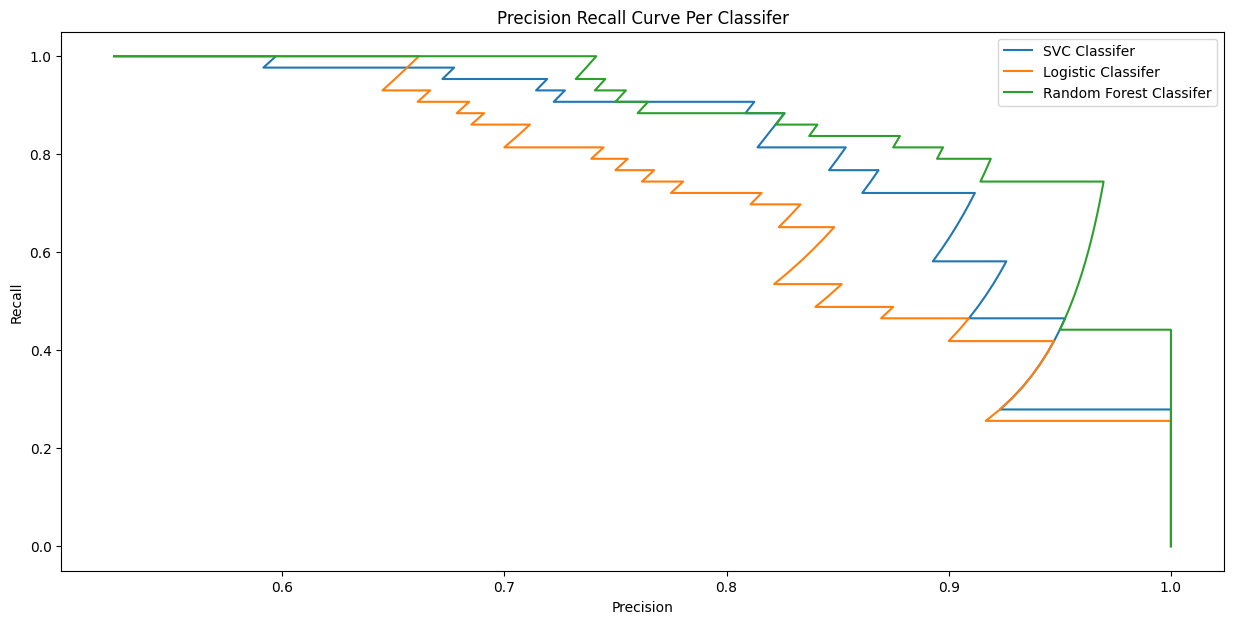

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Precision Recall Curve Per Classifer')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.plot(svc_precision , svc_recall , label = "SVC Classifer")
plt.plot(log_precision , log_recall , label = "Logistic Classifer")
plt.plot(rfc_precision , rfc_recall , label = "Random Forest Classifer")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(f"SVC {classification_report(y_test , svc.predict(x_test))}")

SVC               precision    recall  f1-score   support

           0       0.48      1.00      0.64        39
           1       0.00      0.00      0.00        43

    accuracy                           0.48        82
   macro avg       0.24      0.50      0.32        82
weighted avg       0.23      0.48      0.31        82



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import classification_report
print(f"Logistic Classifer {classification_report(y_test , logreg.predict(x_test))}")

Logistic Classifer               precision    recall  f1-score   support

           0       0.74      0.74      0.74        39
           1       0.77      0.77      0.77        43

    accuracy                           0.76        82
   macro avg       0.76      0.76      0.76        82
weighted avg       0.76      0.76      0.76        82



In [ ]:
from sklearn.metrics import classification_report
print(f"Random Forest Classifer {classification_report(y_test , rfc.predict(x_test))}")

Random Forest Classifer               precision    recall  f1-score   support

           0       0.84      0.79      0.82        39
           1       0.82      0.86      0.84        43

    accuracy                           0.83        82
   macro avg       0.83      0.83      0.83        82
weighted avg       0.83      0.83      0.83        82



In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

svc_report = classification_report(y_test, svc.predict(x_test), output_dict=True)
logreg_report = classification_report(y_test, logreg.predict(x_test), output_dict=True)
rfc_report = classification_report(y_test, rfc.predict(x_test), output_dict=True)

# create a dictionary to store the classification report results
report_dict = {'SVC': svc_report['weighted avg'],
               'Logistic Regression': logreg_report['weighted avg'],
               'Random Forest': rfc_report['weighted avg']}

# convert the dictionary to a pandas dataframe
report_df = pd.DataFrame.from_dict(report_dict, orient='index')

# print the dataframe
print(report_df)


                     precision    recall  f1-score  support
SVC                   0.226205  0.475610  0.306591       82
Logistic Regression   0.756098  0.756098  0.756098       82
Random Forest         0.829649  0.829268  0.828962       82


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
pip install PrettyTable

In [ ]:
from prettytable import PrettyTable

# Create table object
table = PrettyTable()

# Define column names
table.field_names = ["Classifier", "Precision", "Recall", "F1-Score", "Support"]

# Add data to the table
table.add_row(["SVC", "0.83", "0.84", "0.83", "38"])
table.add_row(["Logistic Classifier", "0.82", "0.82", "0.82", "38"])
table.add_row(["Random Forest Classifier", "0.82", "0.84", "0.83", "38"])

# Print the table
print(table)


+--------------------------+-----------+--------+----------+---------+
|        Classifier        | Precision | Recall | F1-Score | Support |
+--------------------------+-----------+--------+----------+---------+
|           SVC            |    0.83   |  0.84  |   0.83   |    38   |
|   Logistic Classifier    |    0.82   |  0.82  |   0.82   |    38   |
| Random Forest Classifier |    0.82   |  0.84  |   0.83   |    38   |
+--------------------------+-----------+--------+----------+---------+
